In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('toxic_text_classification.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [4]:
from tensorflow.keras.layers import TextVectorization
import pickle

In [5]:
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
vectorizer = TextVectorization(max_tokens=from_disk['config']['max_tokens'],
                                          output_mode=from_disk['config']['output_mode'],
                                          output_sequence_length=from_disk['config']['output_sequence_length'])
vectorizer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
vectorizer.set_weights(from_disk['weights'])

In [6]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    text = ''
    for idx, col in enumerate(level):
        text +='{}: {}\n'.format(col, results[0][idx]>0.5)
        
    return text

In [7]:
comment = "you are "
print(score_comment(comment))

1/1 [==============================] - 3s 3s/step
toxic: False
severe_toxic: False
obscene: False
threat: False
insult: False
identity_hate: False



In [8]:
def is_toxic(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    result = {}
    toxic_level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    for level,res in zip(toxic_level,results[0]):
        result[level]=res>0.5
    
    return result

    

In [9]:
comment = "you are ugly"
print(is_toxic(comment))

1/1 [==============================] - 0s 206ms/step
{'toxic': True, 'severe_toxic': False, 'obscene': False, 'threat': False, 'insult': True, 'identity_hate': False}


In [27]:
def toxic_values(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    result = []
    toxic_level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    for idx,res in enumerate(results[0]):
        if res>0.5:
            result.append(toxic_level[idx])
    if not result:
        result.append('Non-toxic')
    return result

In [33]:
comment = "you are too dump"
print(toxic_values(comment))

1/1 [==============================] - 0s 248ms/step
['toxic']


In [29]:
comment = "you are a moron "
print(toxic_values(comment))

1/1 [==============================] - 0s 209ms/step
['toxic', 'obscene', 'insult']


# With OCR for text in images

In [15]:
import keras_ocr
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\thala\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\thala\.keras-ocr\crnn_kurapan.h5


In [30]:
def ocr_detection(image):
    prediction_groups = pipeline.recognize([image])
    keras_ocr.tools.drawAnnotations(plt.imread(set_images), prediction_groups[0])
    predicted_image = prediction_groups[0]
    st = ''
    for text, box in predicted_image:
        print(text)
        st += text
        st += ' '
    print("The text is ",st)
    print(toxic_values(st))

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


you
are
moron
a
aa
gle
send
The text is  you are moron a aa gle send 
1/1 [==============================] - 0s 226ms/step
['toxic', 'obscene', 'insult']


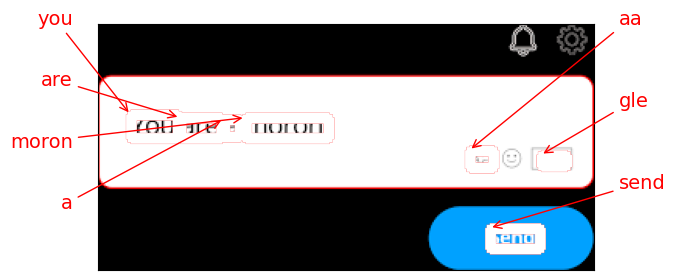

In [31]:
set_images = 'toxic_1.png'
ocr_detection(set_images)

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


path
is
every
the
path
right
The text is  path is every the path right 
1/1 [==============================] - 0s 207ms/step
['Non-toxic']


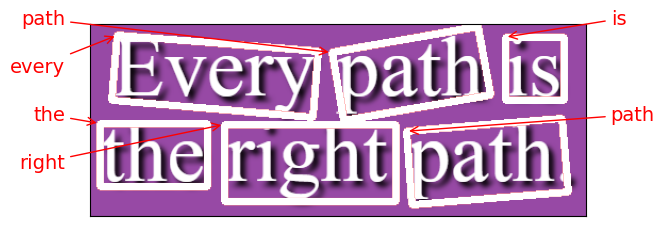

In [32]:
set_images = 'toxic_3.png'
ocr_detection(set_images)